<a href="https://colab.research.google.com/github/AhmedOmarYounusShahhat/Point-Cloud-Objective-Quality/blob/main/D1_MSE_CMSE_software.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Made by Ahmed Omar Younus Shahhat** 

**OPEN SOURCE SOFTWARE**

**CONTACT**

weta.nortm@gmail.com


This is a friendly use software to calculate D1-MSE AND CMSE point cloud quality matrixes .

This software is based on simplification of the calculation to make the reaserchers and interested people to have more effecient way of calculating the quality matrixes in much faster way .

Rather than using all points and taking the mean value for MSE here i am taking random points from a file and do the calculation for them and doing the same in opposite way and taking the max between the 2 values .

This is very good approximation for the real value of the D1-MSE AND CMSE specially for calculating theses matrixes after applying algorithyms or filters for the hole Point cloud dataset .

Resluts could be a bit non appropriate for filters and algorithyms applied just for a part of the Point Cloud dataframe .

The software give you the ability to choose the number of random points that you want to use , more points to use better result you have but it will take more time to compute in case .

The adviced percentage is around 1% of points you have in the PC file.

For any questions please write me on weta.nortm@gmail.com

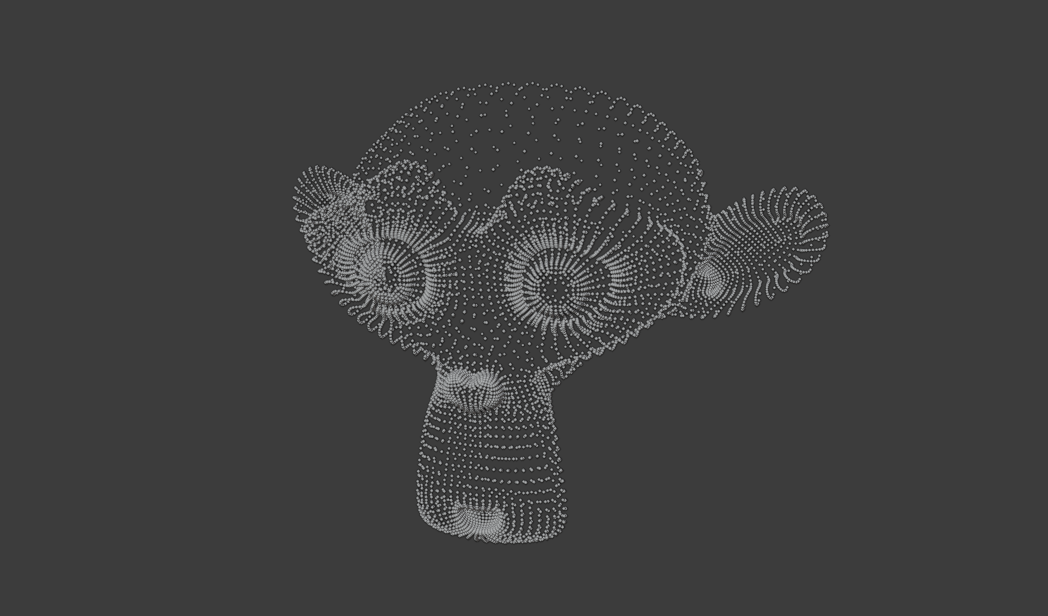



Some libraries to download and import for colab use.

Note if you use the same codes in you local PC you may get error as some of this libraries are colab ones 😊

Your contributions and suggestions are more than welcome .

In [ ]:
!pip install "laspy[lazrs,laszip]"
!pip install laspy
!pip install pyntcloud
from pyntcloud import PyntCloud
import laszip as laszip
import numpy as np
from random import randrange
import random
from google.colab import files

The main code for the software , you just have to run it from colab .

Note that running it from the your local pc could result in errors as some libraries are used from google colab ✌.


In [ ]:

# function take 2 dataframes and calculate randomly the D1 MSE and CMSE for each colour compenent 

def find_closest_c(x_arrayx, y_arrayx , t):
    first = np.random.randint(0, len(x_arrayx), size=t)       # 2 random vectors from with indexes with the dataframs lenghts 
    second= np.random.randint(0, len(y_arrayx), size=t)               
    r=np.unique(first)                                        # 2 uniqe vectors from the prevoius ones to avoid multiplcation of the calculs of the same point
    r1=np.unique(second)
    Sum,Sum1=0,0                                              # 2 dumies varibales to keep the geometric sums
    k=[]                                                      # 2 vectors to keep the indexes of the closest points for each point
    k1=[]
    R,R1=0,0                                                  # 2 dumies varibales to keep the Red component sums
    G,G1=0,0                                                  # 2 dumies varibales to keep the Green component sums
    B,B1=0,0                                                  # 2 dumies varibales to keep the Blue component sums
    i=0                                                       # to keep the count for the substraction
    y_array= y_arrayx[:,:3]                                   # is the vector that take the small random vector of the 2 dataframes
    y_array=y_array[r1]                                       # taking random indexes 
    y_c = y_arrayx[:,3:6]                                     # taking the colours columns from the datafram
    y_c=y_c[r1]                                               # taking the same random indexes as the geomtry vector 
    remaining_x_array = x_arrayx[:,:3]                        # the vector that keep the values of the other complete datafram
    x_c = x_arrayx[:,3:6]                                     # the vector that sperate the colours values from the prevoius one
    for y in y_array:                                         # loop in the small vector that contain the random indexes
        differences = []                                      # to keep the result of the substraction of a point respect all other points and take the min
        #loop for the big datafram 
        for x in remaining_x_array:
            differences.append(((y - x)**2).sum())                  # distance formula in 3D
        min_index_remaining = differences.index(min(differences))   # takoing the index with the min distance 
        R+= ((y_c[:,:1][i]-x_c[:,:1][min_index_remaining])**2)[0]   # difference in Red colour 
        G+= ((y_c[:,1:2][i]-x_c[:,1:2][min_index_remaining])**2)[0] # difference in Green colour
        B+= ((y_c[:,2:3][i]-x_c[:,2:3][min_index_remaining])**2)[0] # difference in Blue colour
        Sum += min(differences)                                     # updating the sum
        i+=1                                                        # incrment the count 
        k.append(min_index_remaining)                               # updating the vector with the indexes 


    # from here is the same loops and idea like before with taking random values from the other dataframe and keeoing all the values of the other one 

    i=0
    y_array= x_arrayx[:,:3]
    y_array=y_array[r]
    y_c=x_arrayx[r]
    y_c = y_c[:,3:6]
    remaining_x_array = y_arrayx[:,:3]
    x_c = y_arrayx[:,3:6]


    for y in y_array:
        differences = []
        
        for x in remaining_x_array:
            differences.append(((y - x)**2).sum())
        min_index_remaining = differences.index(min(differences))
        R1+= ((y_c[:,:1][i]-x_c[:,:1][min_index_remaining])**2)[0]
        G1+= ((y_c[:,1:2][i]-x_c[:,1:2][min_index_remaining])**2)[0]
        B1+= ((y_c[:,2:3][i]-x_c[:,2:3][min_index_remaining])**2)[0]
        Sum1 += min(differences)
        i+=1
        k1.append(min_index_remaining)
    
    D1_MSE=0                                # taking the max of the D1_MSE 
    if (Sum/len(r1)) > (Sum1/len(r)):
      D1_MSE = (Sum/len(r1))
    else:
      D1_MSE = (Sum1/len(r))


    R_MSE=0                                 # taking the max of the R_MSE
    if (R/len(r1)) > (R1/len(r)):
      R_MSE = (R/len(r1))
    else:
      R_MSE = (R1/len(r))


    G_MSE=0                                 # taking the max of the G_MSE
    if (G/len(r1)) > (G1/len(r)):
      G_MSE = (G/len(r1))
    else:
      G_MSE = (G1/len(r))


    B_MSE=0                                 # taking the max of the B_MSE 
    if (B/len(r1)) > (B1/len(r)):
      B_MSE = (B/len(r1))
    else:
      B_MSE = (B1/len(r))
   
    # printing the results 
    print("The D1_MSE = ",D1_MSE)
    print("The R_MSE = ",R_MSE)
    print("The G_MSE = ",G_MSE)
    print("The B_MSE = ",B_MSE)

To get the files we have 2 ways first way is from your local PC as showing down .

Just run the cell and it will ask you 2 times to choose a file 🌝


IMPORTANT :: 
the supported files types by this code are ⏬

asc / .pts / .txt / .csv / .xyz 
.las
.npy / .npz
.obj
.off (with color support)
.pcd
.ply

In [ ]:
uploaded = files.upload()
uploaded_1 = files.upload()

The other way is from the drive .

Note in this way you will be asked the authentication to proceed as your drive would need this permission to take the files .

IMPORTANT ::: 

after you go to the file in drive take the link of the file in drive and replace it with the link near to !gdown in the last line of the code ✌

If you dont know how to get the link of your file you click on the file in drive that possibliy drive can not read it , click on the 3 dots and click share from there you get the link 😇

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

!gdown https://drive.google.com/file/d/1A22_zLvN-RxbSnt0JQOF5GjE72w-3dLx/view?usp=sharing


After having the 2 files now is the time to read them and see them.

In the next cell you should add the names of the files you uploaded in the place in the 2 that you see in the cell . in the first 2 cells change the name inside the PyntCloud.from_file() function and add yours .

Note that the points will be printed and ploted, for the print part control if the x,y,z and the colours are the first 6 colmuns if not change the (0,6) in last 2 lines np.array(pointcloud.points.iloc[:  , 0:6]) to from which colmuns they start and finish .

Note that the plot dose not have good quality, but here its used just to confirm no errors 🤤

            x      y      z  red  green  blue  alpha
0        65.0   16.0  170.0   63     59    60    255
1        66.0   16.0  169.0   63     59    60    255
2        65.0   15.0  170.0   64     60    61    255
3        66.0   15.0  169.0   64     60    61    255
4        67.0   15.0  168.0   63     59    60    255
...       ...    ...    ...  ...    ...   ...    ...
759415  270.0  882.0  216.0  130    132   141    255
759416  268.0  882.0  217.0  129    131   138    255
759417  268.0  882.0  217.0  129    131   138    255
759418  267.0  882.0  218.0  116    118   125    255
759419  268.0  882.0  218.0  118    116   126    255

[759420 rows x 7 columns]
            x      y      z  red  green  blue  alpha
0        66.0   17.0  172.0   62     60    63    255
1        66.0   17.0  171.0   62     61    63    255
2        67.0   17.0  171.0   60     60    63    255
3        68.0   17.0  170.0   59     59    63    255
4        69.0   16.0  170.0   59     59    63    255
...       ...    ..

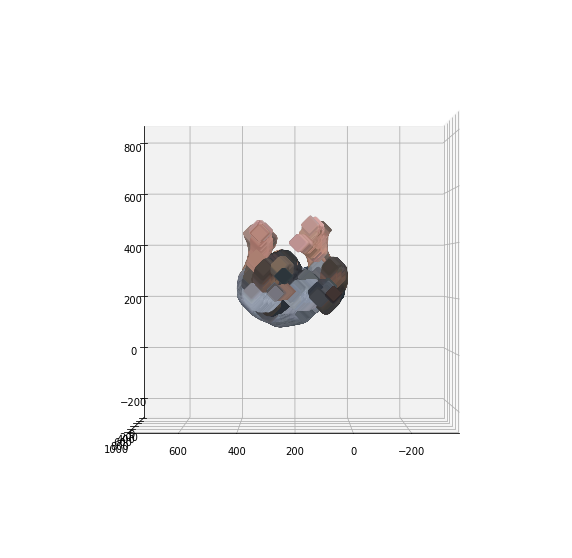

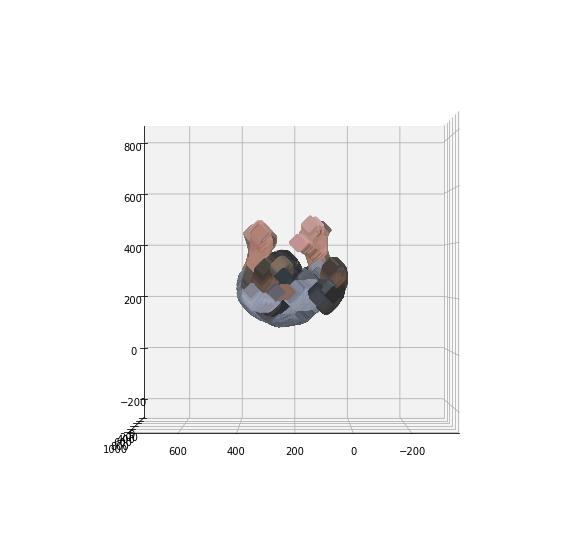

In [ ]:
# change names with your files names here 
pointcloud = PyntCloud.from_file("S23C2AIR2_recon_0000.ply")    
pointcloud_1 = PyntCloud.from_file("S23C2AIR3_recon_0000.ply")  

# printing the points 

print(pointcloud.points)
print(pointcloud_1.points)
pointcloud.plot(return_scene=True)    
pointcloud_1.plot(return_scene=True)    




# check the cordinates and colours if they are the first 6 colmuns or not , in case not chagne the (0:6) to fit the colmuns in your file  
A = np.array(pointcloud.points.iloc[:  , 0:6])  
H = np.array(pointcloud_1.points.iloc[: , 0:6]) 




Now is the last step which it just to run the function .

Note that the function need 3 parameters which 2 of them are already definded in the prevouis cell , the last one is how many random points you want to use. more points you add more time needed to compute .

the computation time depend even on the number of the points that each file have .

i hope you enjoyed this tutorial and for any questions or development write me on this mail with subject D1-Software 

weta.nortm@gmail.com 

HAVE FUN ✌ 😊

In [ ]:
# the last parameter could be changed for any number < of number of points of the samller dataframe of the 2 PC 
find_closest_c(A,H,1000)
